In [452]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [463]:
def green(img):
    shape = np.shape(img)
    return np.count_nonzero(img==255)/(shape[0]*shape[1])
def show_images(im,huesat_mask,test_mask,save_outputs,filename):
    figwidth, figheight = plt.rcParams["figure.figsize"]
    fig, axes = plt.subplots(1, 3, figsize=(2 * figwidth, 1*figheight))
    
    axes[0].imshow(im)
    axes[1].imshow(huesat_mask)
    axes[2].imshow(test_mask)
    if save_outputs:
        fig.savefig(f'green_plots/{filename}.png')
    plt.show()
    plt.close()

In [464]:
def one_img(filename,min_hue=40,max_hue=70,sat_min=0.25,min_val = 20,save_outputs=False,display=False):
    read_from = f'Cropped/{filename}.png'
    
    im = Image.open(read_from).convert('HSV')
    Hue = np.array(im.getchannel('H'))
    rgb = Image.open(read_from).convert('RGB')
    a = np.asarray(rgb, int)
    
    m = np.min(a,2).T
    M = np.max(a,2).T
    C = M - m
    Cmsk = C != 0
    V = M
    S = np.zeros_like(Hue, float).T
    S[Cmsk] = ((C[Cmsk]) / V[Cmsk])
    test_mask = np.zeros_like(Hue, dtype=np.uint8) 
    test_mask[(Hue>min_hue) & (Hue<max_hue) & (S.T > sat_min)& (V.T > min_val)] = 255
    huesat_mask = np.zeros_like(Hue, dtype=np.uint8) 
    huesat_mask[(Hue>min_hue) & (Hue<max_hue) & (S.T > sat_min)& (V.T > min_val)] = 255
    
    if display or save_outputs:
        show_images(im,huesat_mask,test_mask,save_outputs,filename)
    
    return green(huesat_mask)
    
def graph_it_all(filename,min_hue=40,max_hue=70,sat_min=0.25,min_val=20,save_outputs=False,test_mode=False,display_col=0):
    arr = []
    r = 28
    c = 21
    progress = tqdm(total=c*r)
    for x in range(r):
        tmp = []
        for y in range(c):
            if x==display_col and test_mode == True:
                tmp.append(one_img(f'{filename}_{x}_{y}',min_hue,max_hue,sat_min,min_val,save_outputs,display=True))
            else:
                tmp.append(one_img(f'{filename}_{x}_{y}',min_hue,max_hue,sat_min,min_val,save_outputs,display=False))
            progress.update(1)
        arr.append(tmp)
    return arr

  0%|                                                                                          | 0/588 [00:00<?, ?it/s]

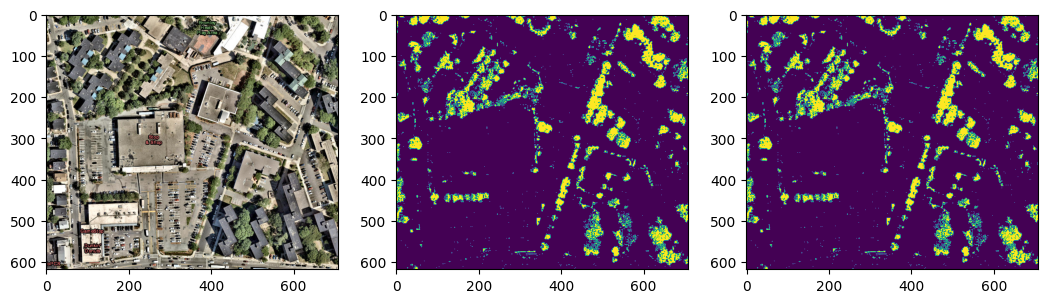

  0%|▏                                                                                 | 1/588 [00:00<03:39,  2.67it/s]

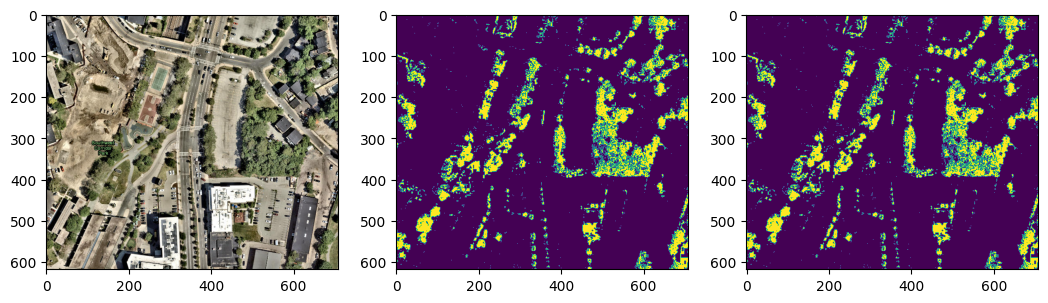

  0%|▎                                                                                 | 2/588 [00:00<03:36,  2.71it/s]

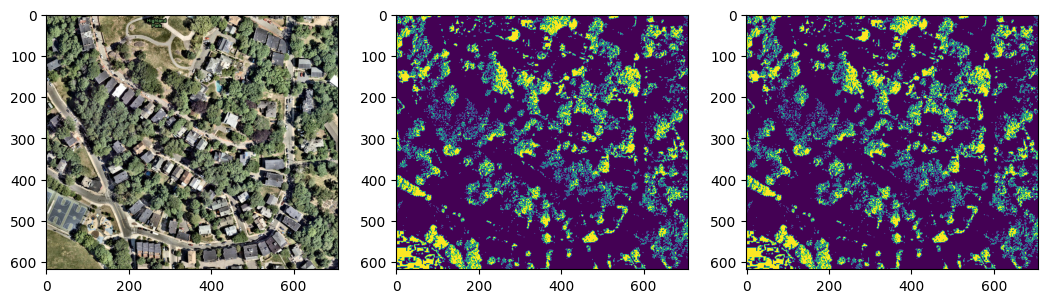

  1%|▍                                                                                 | 3/588 [00:01<03:44,  2.60it/s]

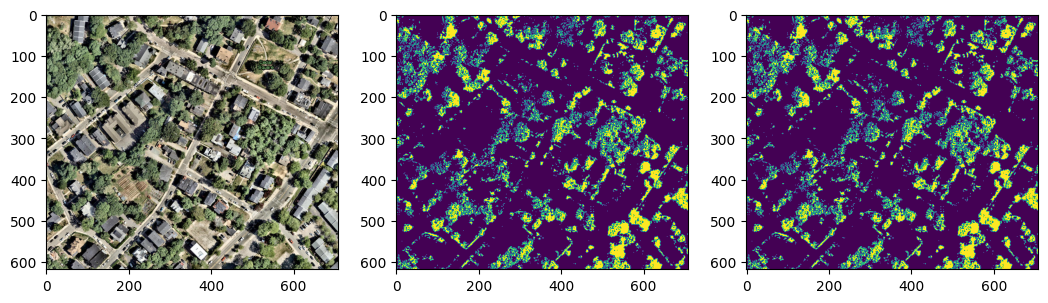

  1%|▌                                                                                 | 4/588 [00:01<03:48,  2.56it/s]

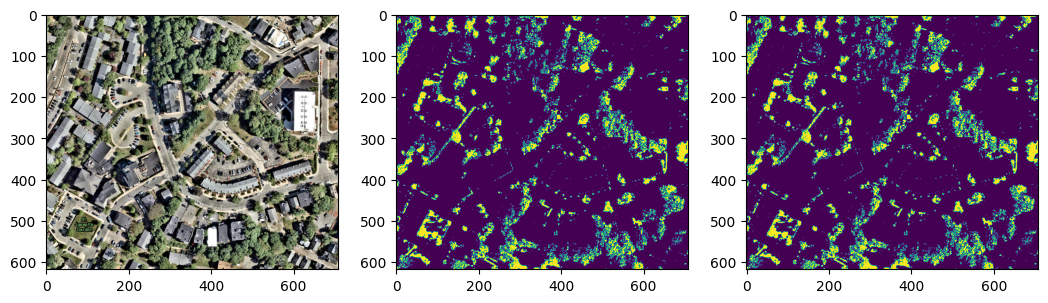

  1%|▋                                                                                 | 5/588 [00:01<03:49,  2.54it/s]

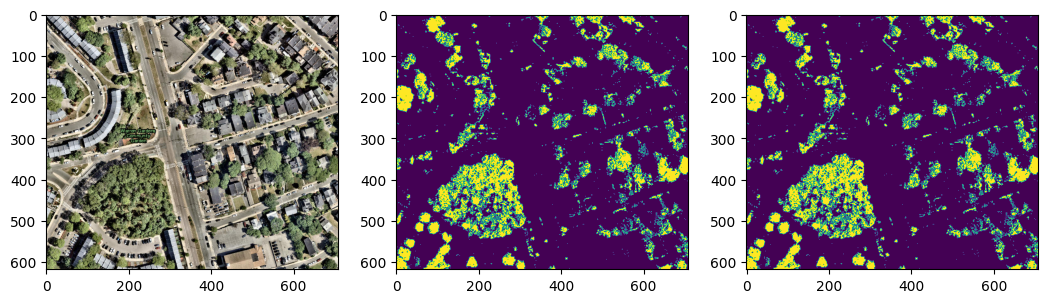

  1%|▊                                                                                 | 6/588 [00:02<03:50,  2.53it/s]

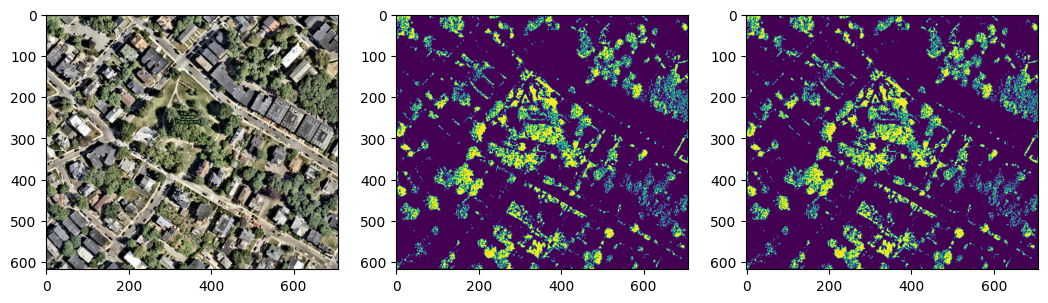

  1%|▉                                                                                 | 7/588 [00:02<03:48,  2.55it/s]

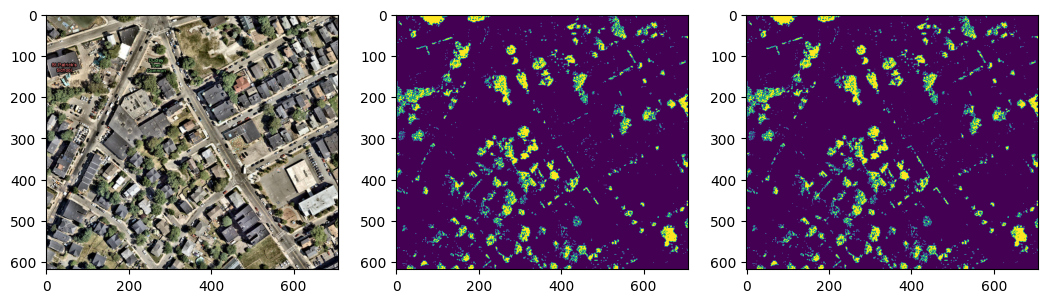

  1%|█                                                                                 | 8/588 [00:03<03:45,  2.57it/s]

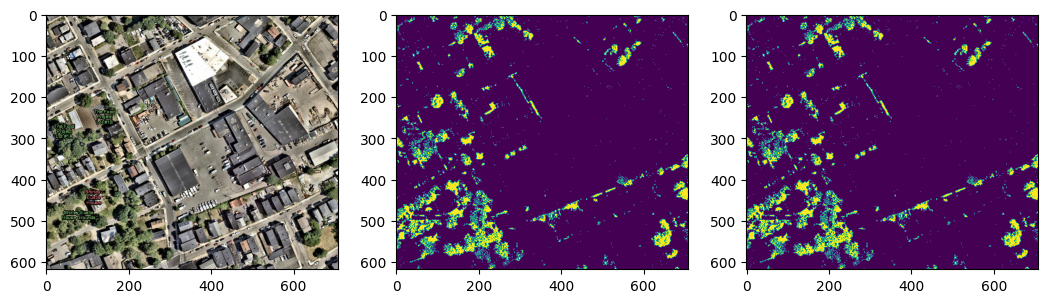

  2%|█▎                                                                                | 9/588 [00:03<03:45,  2.56it/s]

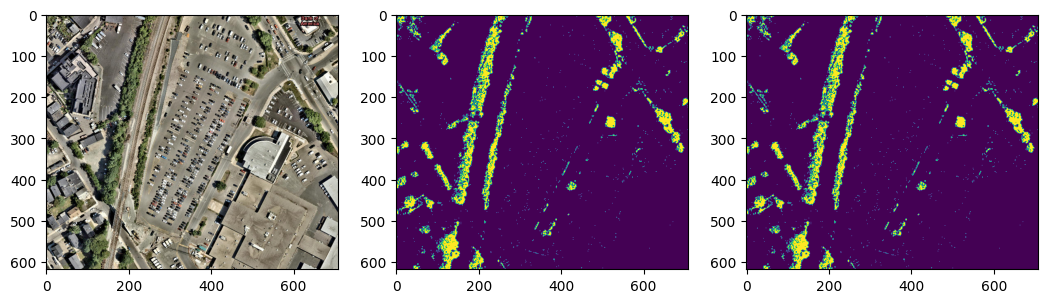

  2%|█▍                                                                               | 10/588 [00:03<03:48,  2.53it/s]

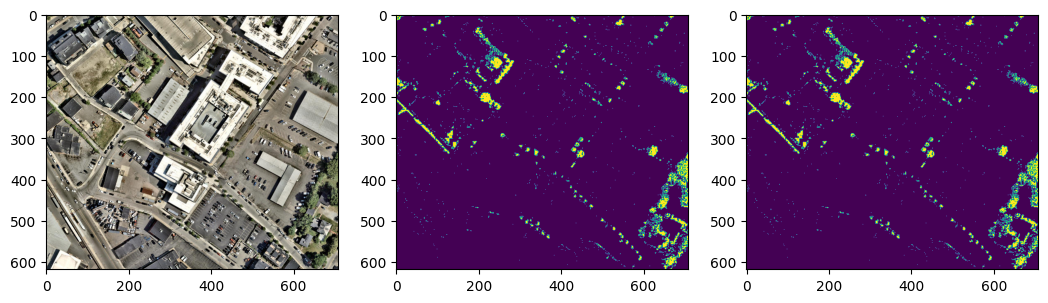

  2%|█▌                                                                               | 11/588 [00:04<03:48,  2.52it/s]

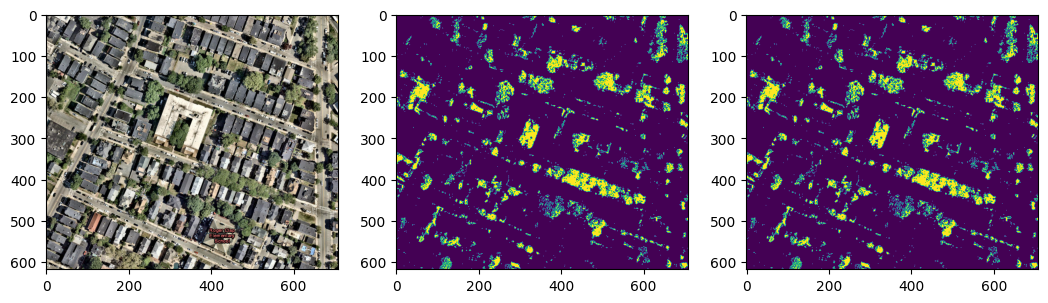

  2%|█▋                                                                               | 12/588 [00:04<04:00,  2.39it/s]

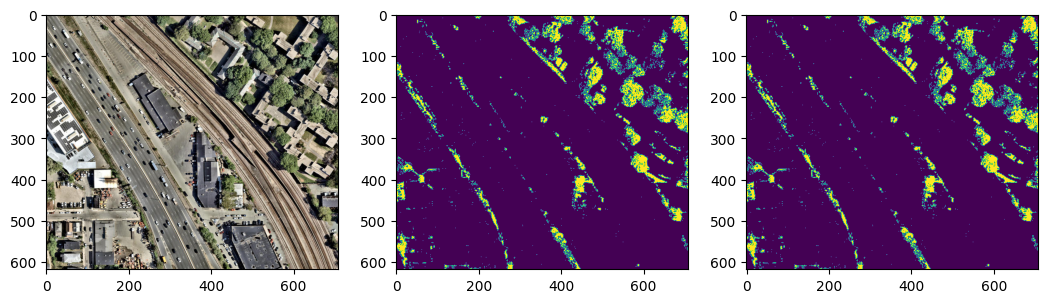

  2%|█▊                                                                               | 13/588 [00:05<03:53,  2.46it/s]

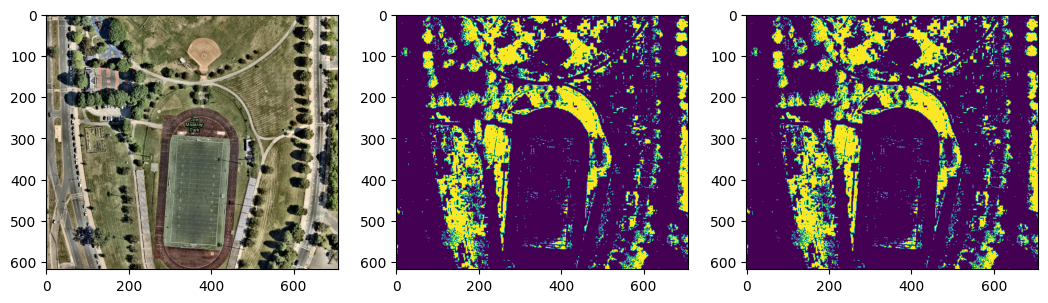

  2%|█▉                                                                               | 14/588 [00:05<03:52,  2.47it/s]

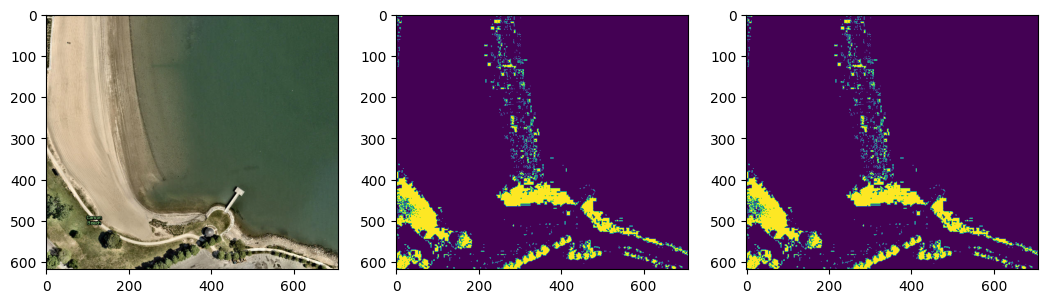

  3%|██                                                                               | 15/588 [00:05<03:47,  2.52it/s]

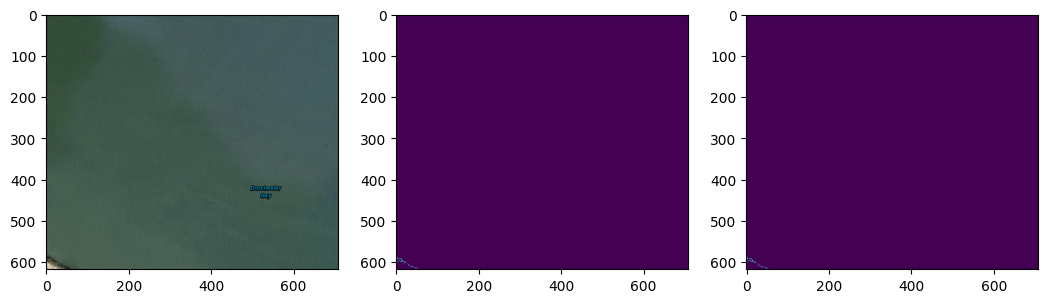

  3%|██▏                                                                              | 16/588 [00:06<03:42,  2.57it/s]

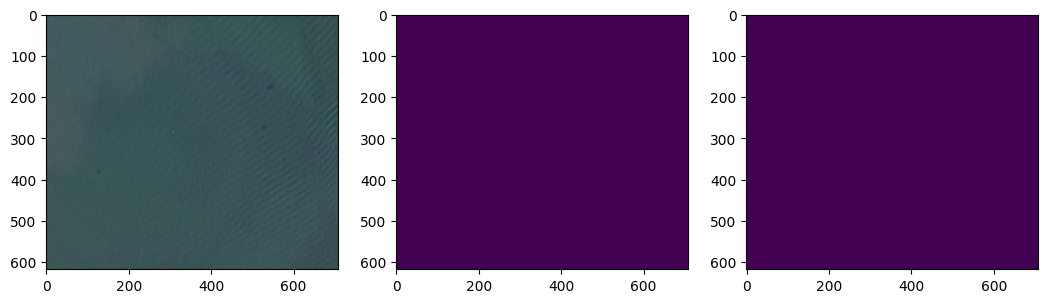

  3%|██▎                                                                              | 17/588 [00:06<03:43,  2.55it/s]

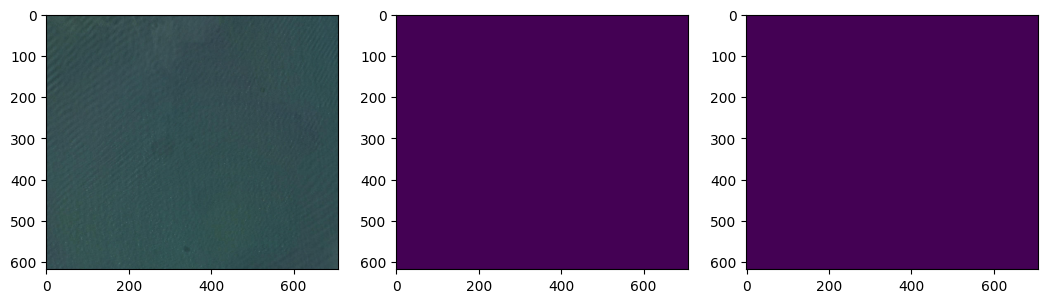

  3%|██▍                                                                              | 18/588 [00:07<03:40,  2.59it/s]

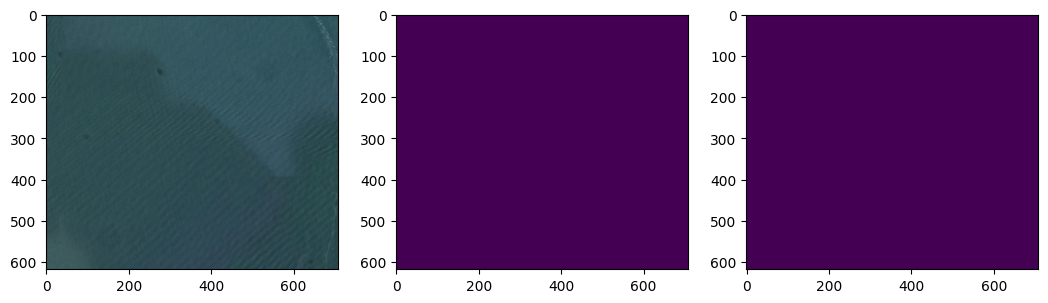

  3%|██▌                                                                              | 19/588 [00:07<03:38,  2.61it/s]

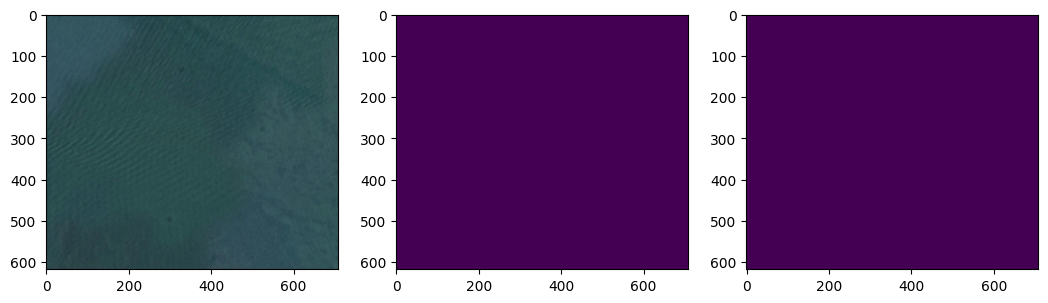

  3%|██▊                                                                              | 20/588 [00:10<11:02,  1.17s/it]

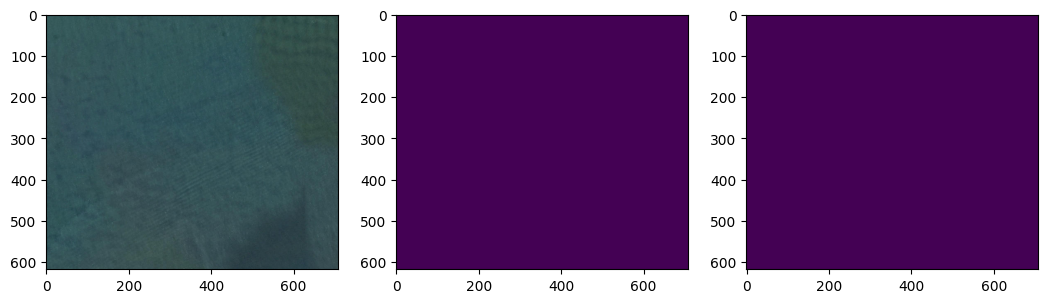

100%|████████████████████████████████████████████████████████████████████████████████| 588/588 [00:46<00:00, 12.75it/s]


In [465]:
test = graph_it_all("screenshot",save_outputs=False,test_mode=True,display_col=0)

In [367]:
np.savetxt("GreenPercentagesBoston/grid_scores.csv", test, delimiter=",")